In [11]:
import matplotlib.pyplot as plt
import numpy as np

print('Imports complete.')

Imports complete.


In [17]:
# Parse the data in the results file
resultsfile = open('./alexandria_results.txt', 'r')

kdd_lines = []
stan_lines = []
xeu_lines = []

last_title = None

kdd_title = 'KDD Dataset Experiments'
stan_title = 'Stanford Dataset Experiments'
xeu_title = 'Xeutangx Dataset Experiments'

for line in resultsfile.readlines():
    # Determine if this row is a new table
    if line == kdd_title + '\n' or line == stan_title + '\n' or line == xeu_title + '\n':
        last_title = line.strip()
        
    # Determine if the line is a header or data row
    if len(line) > 7 and line[:7] == 'sklearn':
        # It is a data row
        if last_title == kdd_title:
            kdd_lines.append(line[8:].strip())
        elif last_title == stan_title:
            stan_lines.append(line[8:].strip())
        elif last_title == xeu_title:
            xeu_lines.append(line[8:].strip())
            
resultsfile.close()
            
# Print all of the KDD lines
print(kdd_title)
for line in kdd_lines:
    print(line)

# Print all of the Standford lines
print(stan_title)
for line in stan_lines:
    print(line)

# Print all of the Xeutangx lines
print(xeu_title)
for line in xeu_lines:
    print(line)

KDD Dataset Experiments
random forest                 0.8516±0.0273  0.8534±0.0255  0.8516±0.0273  0.8404±0.0671
decision tree                 0.8042±0.0256  0.8025±0.0246  0.8042±0.0256  0.6089±0.0627
k neighbors                   0.8424±0.0253  0.8409±0.0263  0.8424±0.0253  0.7963±0.0729
naive bayes.Gaussian          0.8462±0.0275  0.8469±0.0261  0.8462±0.0275  0.8274±0.0777
adaboost                      0.8547±0.0281  0.8598±0.0237  0.8547±0.0281  0.8592±0.0607
gradient boost                0.8566±0.0277  0.8616±0.0233  0.8566±0.0277  0.8616±0.0611
extreme gradient boost        0.8558±0.0274  0.8600±0.0234  0.8558±0.0274  0.8604±0.0601
logistic regression           0.8525±0.0257  0.8563±0.0227  0.8525±0.0257  0.8583±0.0615
discriminant analysis.Linear  0.8489±0.0238  0.8528±0.0210  0.8489±0.0238  0.8553±0.0614
Stanford Dataset Experiments
random forest                 0.7627±0.1982  0.8350±0.0470  0.7627±0.1982  0.7628±0.1214
decision tree                 0.5463±0.2250  0.6420±0.173

In [34]:
all_lines = []
for line in kdd_lines:
    all_lines.append(line)
for line in stan_lines:
    all_lines.append(line)
for line in xeu_lines:
    all_lines.append(line)

# Put all the data into a dictionary
results = dict()

# This will be organized like this:
#   results[ model_name ][ metric_name ] = [ KDD Metric, Stanford Metric, Xeutangx Metric ]

for line in all_lines:
    larr = line.split(' ')
    model_name = (' '.join(larr[:-8])).strip()
    
    #print(model_name)
    
    if not model_name in results:
        results[model_name] = dict()
        
    # Initialize all of the metric arrays if necessary
    metrics = ['acc_avg', 'acc_std', 'prec_avg', 'prec_std', 'rec_avg', 'rec_std', 'auc_avg', 'auc_std']
    for metric in metrics:
        if not metric in results[model_name]:
            results[model_name][metric] = []
        
    acc_avg = float(larr[-7].split('\u00B1')[0])
    results[model_name]['acc_avg'].append( acc_avg )
    
    acc_std = float(larr[-7].split('\u00B1')[1])
    results[model_name]['acc_std'].append( acc_std )
    
    prec_avg = float(larr[-5].split('\u00B1')[0])
    results[model_name]['prec_avg'].append( prec_avg )
    
    prec_std = float(larr[-5].split('\u00B1')[1])
    results[model_name]['prec_std'].append( prec_std )
    
    rec_avg = float(larr[-3].split('\u00B1')[0])
    results[model_name]['rec_avg'].append( rec_avg )
    
    rec_std = float(larr[-3].split('\u00B1')[1])
    results[model_name]['rec_std'].append( rec_std )
    
    auc_avg = float(larr[-1].split('\u00B1')[0])
    results[model_name]['auc_avg'].append( auc_avg )
    
    auc_std = float(larr[-1].split('\u00B1')[1])
    results[model_name]['auc_std'].append( auc_std )
    
print(results)

{'random forest': {'acc_avg': [0.8516, 0.7627, 0.7693], 'acc_std': [0.0273, 0.1982, 0.04], 'prec_avg': [0.8534, 0.835, 0.7616], 'prec_std': [0.0255, 0.047, 0.0424], 'rec_avg': [0.8516, 0.7627, 0.7693], 'rec_std': [0.0273, 0.1982, 0.04], 'auc_avg': [0.8404, 0.7628, 0.7387], 'auc_std': [0.0671, 0.1214, 0.0661]}, 'decision tree': {'acc_avg': [0.8042, 0.5463, 0.6217], 'acc_std': [0.0256, 0.225, 0.0712], 'prec_avg': [0.8025, 0.642, 0.6707], 'prec_std': [0.0246, 0.1737, 0.0526], 'rec_avg': [0.8042, 0.5463, 0.6217], 'rec_std': [0.0256, 0.225, 0.0712], 'auc_avg': [0.6089, 0.5414, 0.5519], 'auc_std': [0.0627, 0.1243, 0.0761]}, 'k neighbors': {'acc_avg': [0.8424, 0.345, 0.7802], 'acc_std': [0.0253, 0.2596, 0.0259], 'prec_avg': [0.8409, 0.5292, 0.7683], 'prec_std': [0.0263, 0.245, 0.0262], 'rec_avg': [0.8424, 0.345, 0.7802], 'rec_std': [0.0253, 0.2596, 0.0259], 'auc_avg': [0.7963, 0.3426, 0.7219], 'auc_std': [0.0729, 0.1817, 0.0439]}, 'naive bayes.Gaussian': {'acc_avg': [0.8462, 0.8405, 0.8107], 

In [75]:
def graph_metric(metric):
    # Graph the accuracy of all the models
    bar_width = 0.10
    fig = plt.subplots(figsize=(12, 8))

    # Make plots
    bar_pos = []
    for model_name in results.keys():
        # Figure out where the next bar needs to go
        if len(bar_pos) == 0:
            # Set up equally-spaced positions for each dataset
            bar_pos = np.arange( 3 )
        else:
            bar_pos = [ x + bar_width for x in bar_pos ]

        # Find the appropriate label
        label = ''
        if model_name == 'random forest':
            label = 'Random Forest'
        elif model_name == 'decision tree':
            label = 'Decision Tree'
        elif model_name == 'k neighbors':
            label = 'K-Nearest Neighbors'
        elif model_name == 'naive bayes.Gaussian':
            label = 'Naive Bayes'
        elif model_name == 'adaboost':
            label = 'AdaBoost'
        elif model_name == 'gradient boost':
            label = 'Gradient Boost'
        elif model_name == 'extreme gradient boost':
            label = 'Extreme Gradient Boost'
        elif model_name == 'logistic regression':
            label = 'Logistic Regression'
        elif model_name == 'discriminant analysis.Linear':
            label = 'Linear Discriminant Analysis'

        # Plot the values
        plt.bar(bar_pos, 
                results[model_name][metric + '_avg'], 
                width=bar_width, 
                yerr=results[model_name][metric + '_std'], 
                label=label
        )
        
    # Set the x and y labels
    if metric == 'acc':
        metric = 'Accuracy'
    elif metric == 'prec':
        metric = 'Precision'
    elif metric == 'rec':
        metric = 'Recall'
    elif metric == 'auc':
        metric = 'Area Under the ROC Curve'
    
    plt.ylabel(metric)
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    
    plt.xlabel('Dataset')
    plt.xticks([0.4, 1.4, 2.4], ('KDD', 'Standford', 'Xeutangx'))

    plt.legend(loc='lower left')
    plt.show()

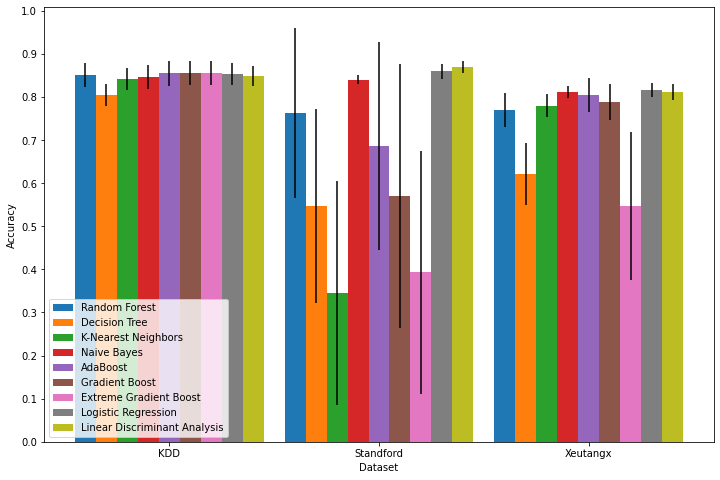

In [76]:
graph_metric('acc')

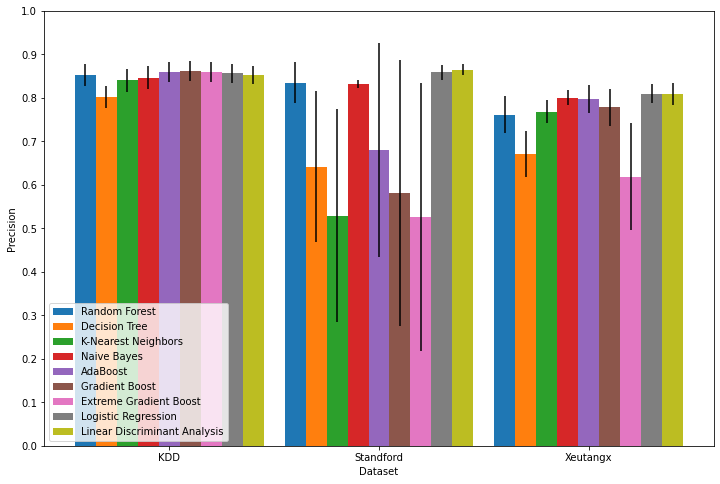

In [77]:
graph_metric('prec')

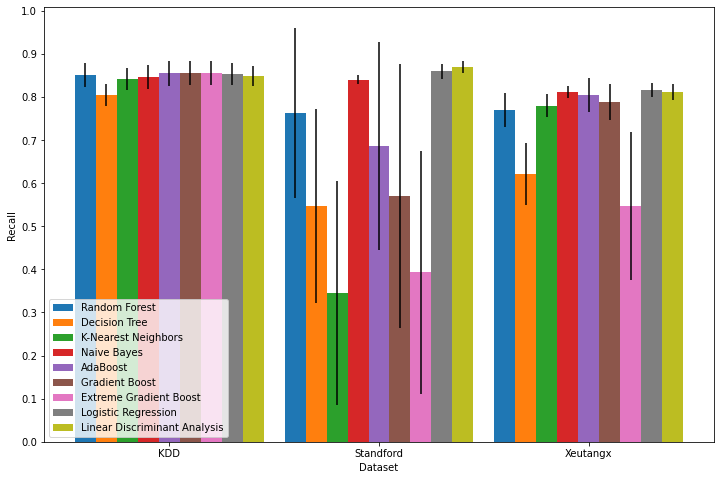

In [78]:
graph_metric('rec')

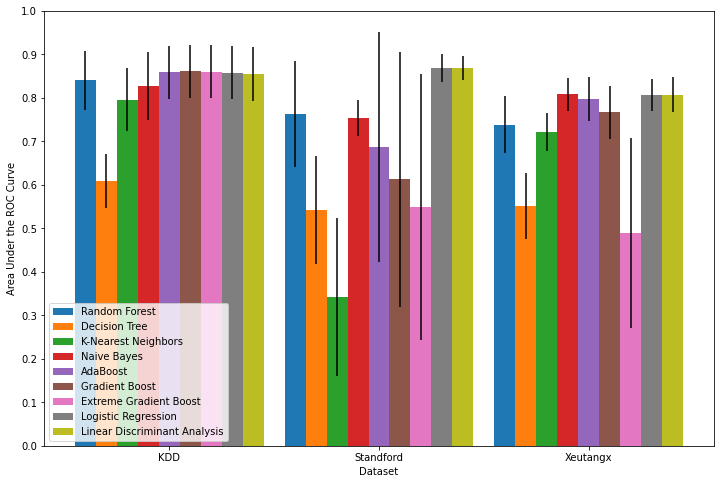

In [79]:
graph_metric('auc')